In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import glob

In [80]:
#data_dir = "G:\\1_Data1\\93_BaikalJun2023Sea\\meteo\\"
#data_dir = "G:\\1_Data1\\90_BaikalJun2022Sea\\Meteo\\"
#data_dir = "G:\\1_Data1\\98_BaikalJul2024Sea\\origin\\"
data_dir = r"C:\Users\redmi\1_Data1\99_BaikalOct2024\origin\meteo"
data_dir = r"C:\Users\redmi\1_Data1\77_BaikalMar2018\meteo"
data_dir = r"C:\Users\redmi\1_Data1\67_BaikalDec2016\meteo"
#data_dir = r'C:\Users\redmi\1_Data1\sea\meteo'
pwd = data_dir
data_files = glob.glob(pwd + r"\*.txt")
data_files



['C:\\Users\\redmi\\1_Data1\\67_BaikalDec2016\\meteo\\20161216_1345_049.txt',
 'C:\\Users\\redmi\\1_Data1\\67_BaikalDec2016\\meteo\\20161220_0212_049.txt']

In [81]:
dfl = []
for f in data_files:
    df = pd.read_csv(f,
                     encoding_errors='ignore',
                     header=None,
                     skiprows=[0],
                     engine='python',
                     skipfooter=1,
                     sep=' ',
                     names=['date', 'time', 'Temp', 'Wh', 'Wdir', 'vx', 'vy', 'vz', 'Press', 'RH'],
                     #parse_dates={'DateTime':['date', 'time']},
                     #dayfirst=True,
                     on_bad_lines='skip',
                    )
    dfl.append(df)
    del(df)
df = pd.concat(dfl)

In [82]:
df['DateTime'] = pd.to_datetime(df['date'] + ' ' + df['time'], dayfirst=True, cache=True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4362 entries, 0 to 1859
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      4362 non-null   object        
 1   time      4362 non-null   object        
 2   Temp      4362 non-null   float64       
 3   Wh        4362 non-null   float64       
 4   Wdir      4362 non-null   float64       
 5   vx        4362 non-null   float64       
 6   vy        4362 non-null   float64       
 7   vz        4362 non-null   float64       
 8   Press     4362 non-null   float64       
 9   RH        4362 non-null   float64       
 10  DateTime  4362 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 408.9+ KB


In [84]:
df.sort_values(by='DateTime', inplace=True)
df

,date,time,Temp,Wh,Wdir,vx,vy,vz,Press,RH,DateTime
0,16.12.2016,13:45:23,-0.680,0.399,131.5,0.228,0.258,-0.054,721.4,53.6,2016-12-16 13:45:23
1,16.12.2016,13:47:23,-0.309,0.382,130.1,0.195,0.232,-0.024,721.5,56.6,2016-12-16 13:47:23
2,16.12.2016,13:49:23,-1.143,0.685,155.6,0.592,0.268,-0.024,720.9,55.1,2016-12-16 13:49:23
3,16.12.2016,13:51:23,-1.721,1.016,170.8,0.989,0.160,0.059,720.5,56.9,2016-12-16 13:51:23
4,16.12.2016,13:53:23,-1.764,0.716,181.5,0.676,-0.018,-0.035,720.5,61.6,2016-12-16 13:53:23
...,...,...,...,...,...,...,...,...,...,...,...
1855,22.12.2016,16:03:54,-4.727,1.261,59.8,-0.386,0.664,-0.146,723.4,79.9,2016-12-22 16:03:54
1856,22.12.2016,16:05:54,-6.047,0.818,49.9,-0.420,0.499,-0.174,722.7,79.1,2016-12-22 16:05:54
1857,22.12.2016,16:07:54,-5.880,1.020,26.8,-0.494,0.250,-0.110,722.8,82.8,2016-12-22 16:07:54
1858,22.12.2016,16:09:54,-3.455,2.953,129.5,1.789,2.167,0.390,724.1,89.6,2016-12-22 16:09:54


In [85]:
def filter_df(df):
    pass

array([<Axes: xlabel='DateTime'>, <Axes: xlabel='DateTime'>], dtype=object)

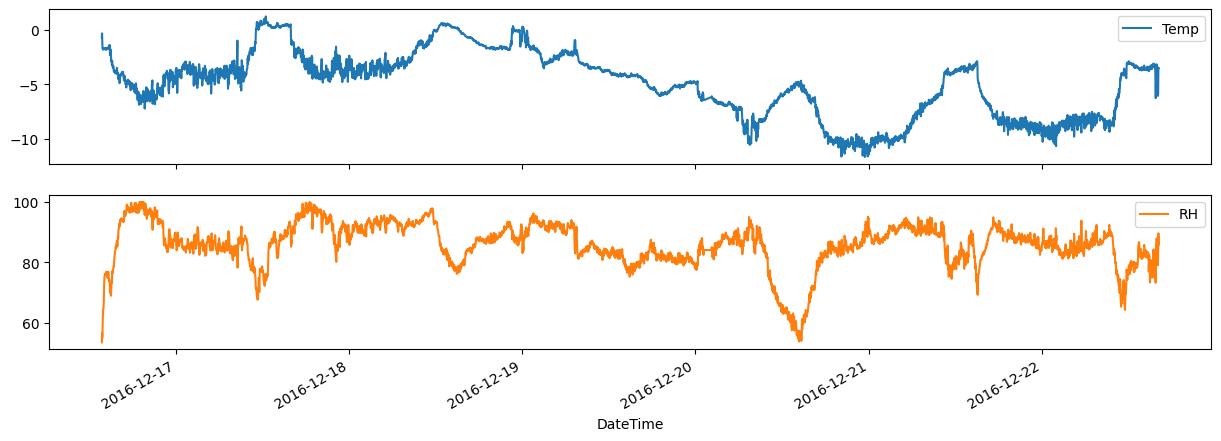

In [86]:
df.plot(x='DateTime', y=['Temp', 'RH'], subplots=True)

array([<Axes: xlabel='DateTime'>, <Axes: xlabel='DateTime'>], dtype=object)

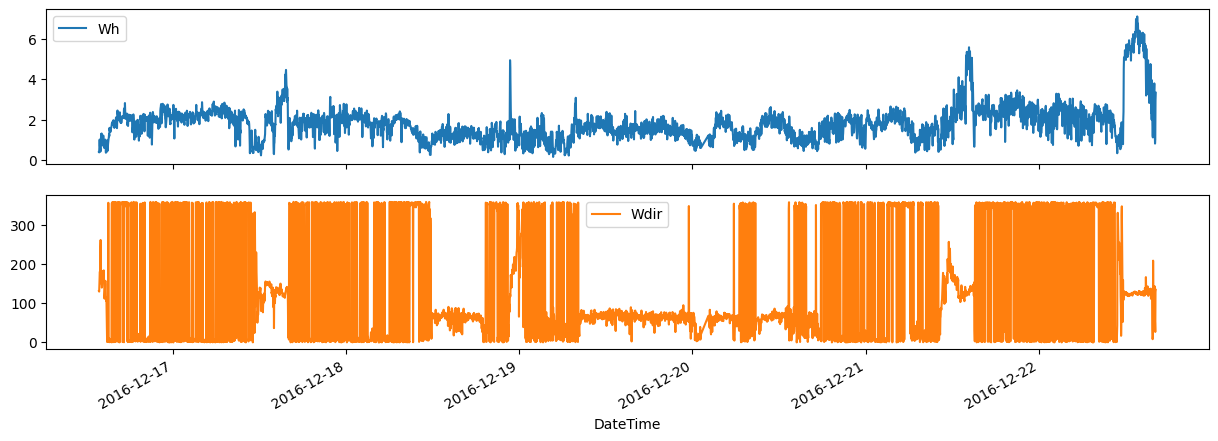

In [87]:
df.plot(x='DateTime', y=['Wh', 'Wdir'], subplots=True)

In [88]:
df.to_csv(pwd+'//..//meteo.txt', sep='\t')

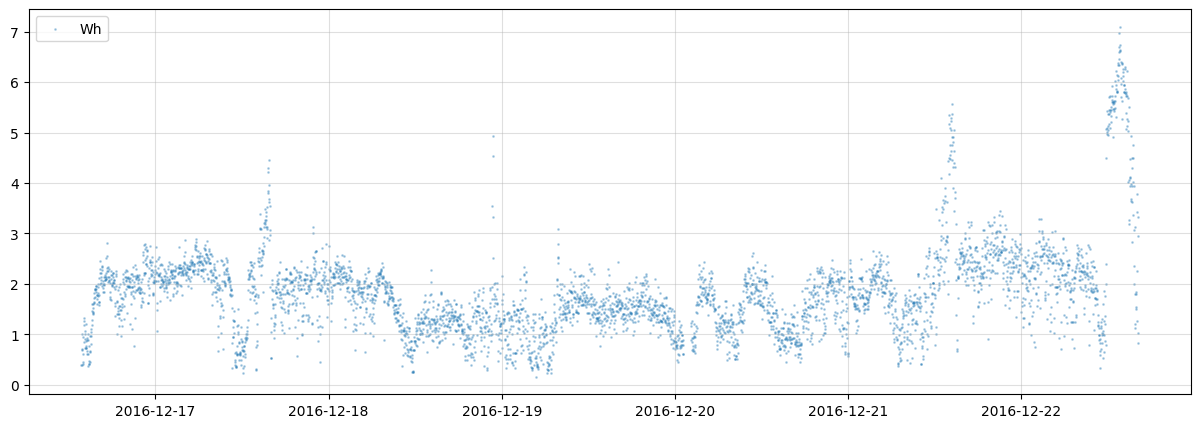

In [89]:
plt.rcParams['figure.figsize']=[15, 5]
plt.scatter('DateTime', 'Wh', data=df, s=1, alpha=0.3)
#plt.xlim(pd.to_datetime('2018-03-23 00:00'), pd.to_datetime('2018-03-31 00:00'))
plt.legend()
plt.grid(alpha=0.4)

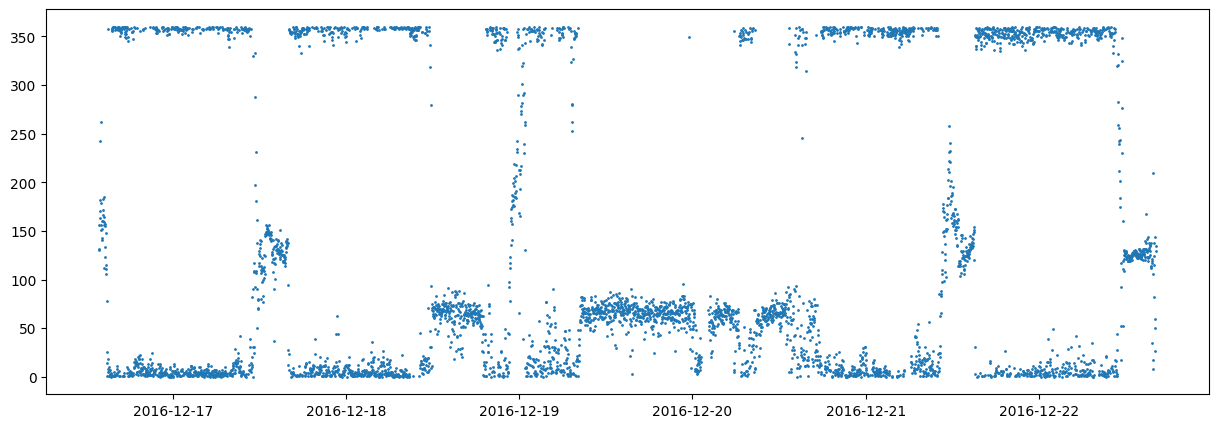

In [90]:
plt.scatter('DateTime', 'Wdir', data=df, s=1)

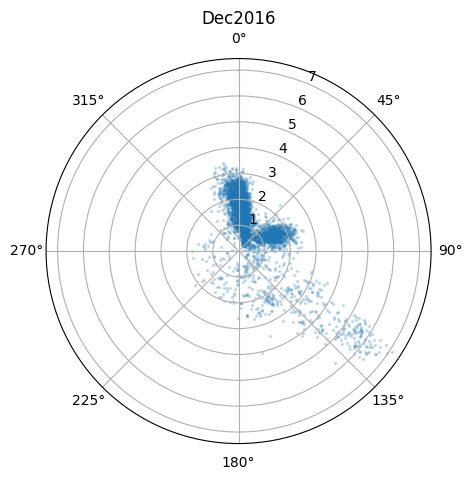

<Figure size 1500x500 with 0 Axes>

In [92]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r
r = df['Wh']
theta = df['Wdir'] / 180 * np.pi
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(theta, r, s=2, alpha=0.2)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
#ax.set_rmax(2)
#ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title('Dec2016')
plt.show()
plt.savefig(pwd+r'/rosewind.png')

In [30]:
dfm=df.copy()

In [62]:
df = pd.read_csv('~/1_Data1/sea/AllSea.txt',
                 header=0,
                 # skip_blank_lines=True,
                 skipinitialspace=True,
                 #na_values='--',
                 sep='\t',
                 decimal='.',
                 # nrows=100000,
                 parse_dates=['DateTime'],
                 dayfirst=False
                )


In [63]:
colstoleft = ['DateTime', 'Longitude', 'Latitude', 'Speed', 'Course']

In [64]:
df.drop([i for i in df.columns if i not in colstoleft],axis='columns', errors='ignore', inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445736 entries, 0 to 445735
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   DateTime   445736 non-null  datetime64[ns]
 1   Longitude  445736 non-null  float64       
 2   Latitude   445736 non-null  float64       
 3   Speed      63977 non-null   float64       
 4   Course     63971 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.0 MB


In [66]:
df = pd.merge(left=df, right=dfm, left_on='DateTime', right_on='DateTime', how='outer')

In [67]:
df.sort_values(by='DateTime', inplace=True)
df.reset_index(drop=True, inplace=True)

In [68]:
df.dropna(subset=['DateTime'], axis='index')


,DateTime,Longitude,Latitude,Speed,Course,date,time,Temp,Wh,Wdir,vx,vy,vz,Press,RH
0,2013-05-28 22:00:38,104.649879,51.781395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-05-28 22:01:38,104.649879,51.781395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-05-28 22:02:38,104.649879,51.781395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-05-28 22:03:38,104.649879,51.781395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-05-28 22:04:38,104.649879,51.781395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524707,2024-08-05 14:49:14,NaN,NaN,NaN,NaN,05.08.2024,14:49:14,21.882,1.959,338.8,-1.809,-0.700,0.093,714.6,39.3
524708,2024-08-05 14:50:14,NaN,NaN,NaN,NaN,05.08.2024,14:50:14,21.798,1.987,332.6,-1.706,-0.884,0.165,714.5,40.5
524709,2024-08-05 14:51:14,NaN,NaN,NaN,NaN,05.08.2024,14:51:14,21.891,2.441,351.0,-2.359,-0.374,-0.124,714.5,39.1
524710,2024-08-05 14:52:14,NaN,NaN,NaN,NaN,05.08.2024,14:52:14,21.947,2.477,349.0,-2.388,-0.466,-0.142,714.5,37.9


In [69]:
len(set(df['DateTime']))

524709

In [92]:
df['Lat'] = df['Latitude']#.rolling(3, min_periods=1, center=True).mean()
df['Long'] = df['Longitude']#.rolling(3, min_periods=1, center=True).mean()

In [93]:
df['Lat'] = df['Lat'].interpolate(method='linear')
df['Long'] = df['Long'].interpolate(method='linear')

In [94]:
df['mywindspeed'] = np.sqrt(np.power(df['vx'],2)+np.power(df['vy'],2))

In [95]:
df['mywinddir'] = np.arctan2(-df['vy'], df['vx']) * 180 / np.pi + 180

(18779.0, 18793.0)

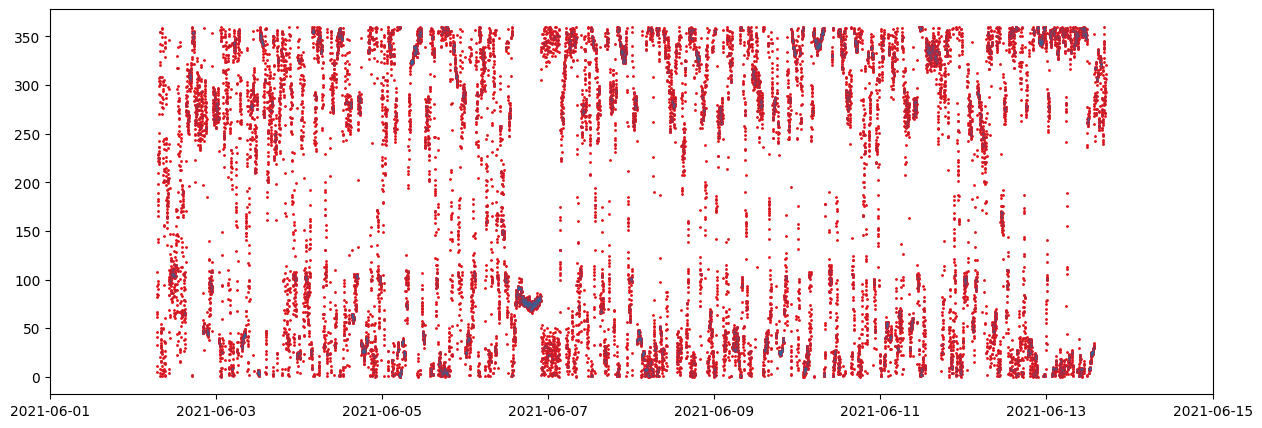

In [96]:
plt.rcParams['figure.figsize']=[15, 5]
plt.scatter('DateTime', 'mywinddir', data=df, s=1, c='red')
plt.scatter('DateTime', 'Wdir', data=df, s=1, alpha=0.1)
plt.xlim(pd.to_datetime('2021-06-01 00:00'), pd.to_datetime('2021-06-15 00:00'))

In [97]:
df['DateSec'] = df['DateTime'].astype('int64')/10**9
df['dt'] = df['DateSec'].shift(-1) - df['DateSec'].shift(1)

In [98]:
R_EARTH = 6371000  #meters
df['vesselvy'] = (df['Lat'].shift(-1) - df['Lat'].shift(1)) * 2 * np.pi * R_EARTH / 360
df['vesselvx'] = (df['Long'].shift(-1) - df['Long'].shift(1)) * (np.cos(df['Lat'] * np.pi / 180 ) * 2 * np.pi * R_EARTH/360)
df['vesselspeed'] = np.sqrt(np.power(df['vesselvy'],2) + np.power(df['vesselvx'],2))/df['dt']
df.describe()

,DateTime,Longitude,Latitude,Speed,Course,Temp,Wh,Wdir,vx,vy,...,RH,Lat,Long,mywindspeed,mywinddir,DateSec,dt,vesselvy,vesselvx,vesselspeed
count,524712,445736.000000,445736.000000,63977.000000,63971.000000,82056.000000,82056.000000,82056.000000,82056.000000,82056.000000,...,82056.000000,524712.000000,524712.000000,82056.000000,82056.000000,5.247120e+05,5.247100e+05,524710.000000,524710.000000,524710.000000
mean,2020-08-24 12:18:54.923479552,107.164331,53.170741,2.264219,104.958258,9.089555,3.535537,191.304085,-1.914326,-0.052145,...,83.371441,53.112735,107.067220,3.471352,191.286776,1.598272e+09,1.345852e+03,0.040529,0.135306,2.162379
min,2013-05-28 22:00:38,103.752400,51.504091,0.017000,0.000000,-13.156000,0.053000,0.000000,-15.210000,-10.099000,...,23.900000,51.504091,103.752400,0.001414,0.000000,1.369778e+09,1.000000e+00,-126106.944672,-150153.638402,0.000000
25%,2017-05-30 19:16:04,105.397423,51.899628,0.196000,0.000000,4.849000,1.592000,63.300000,-3.686000,-1.659000,...,76.300000,51.877020,105.254130,1.499501,63.288115,1.496172e+09,2.000000e+01,-16.542824,-9.697266,0.089118
50%,2021-06-10 23:13:20,107.465817,53.021507,2.929650,51.064100,6.709000,2.999000,238.500000,-1.223000,-0.195000,...,85.400000,52.938537,107.250428,2.957911,238.434887,1.623367e+09,3.800000e+01,0.000000,0.000000,2.362227
75%,2023-06-08 16:51:45,108.844707,54.064425,4.167870,211.219500,13.592500,4.861000,311.600000,0.079000,1.318000,...,93.800000,53.940700,108.760300,4.825329,311.643639,1.686243e+09,4.000000e+01,16.234459,16.784887,4.180735
max,2024-08-05 14:53:15,109.870200,55.768120,4.664000,359.778000,33.559000,30.563000,360.000000,9.250000,30.550000,...,100.000000,55.768120,109.870200,30.550303,359.990391,1.722870e+09,9.431542e+07,9430.682389,7782.607933,59.423373
std,NaN,1.835688,1.280048,1.818231,118.144217,5.612533,2.917592,125.500877,2.661189,3.153938,...,13.932341,1.278127,1.842778,2.940447,125.501989,1.038361e+08,2.911839e+05,286.373451,380.381102,2.012261


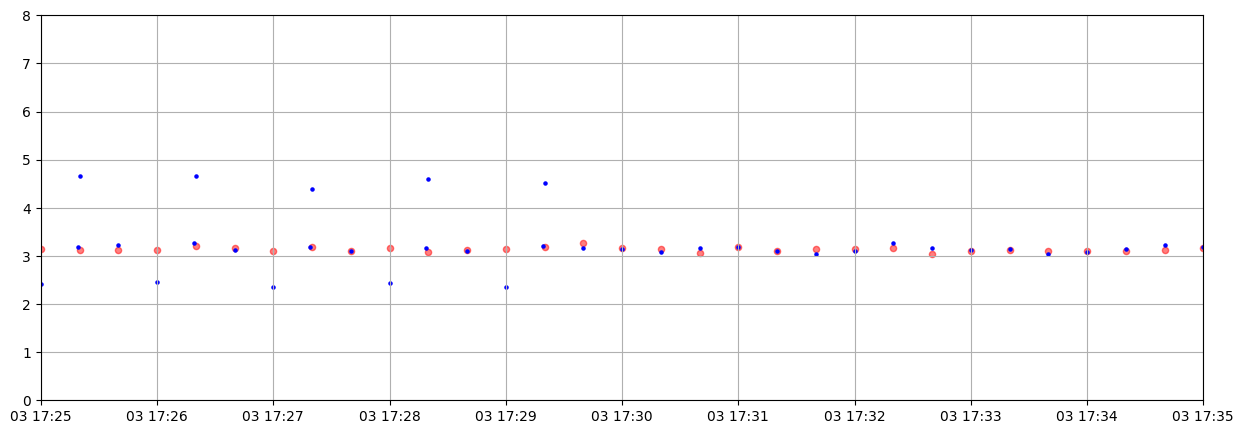

In [101]:
plt.scatter('DateTime', 'Speed', data=df, c='red', s=20, alpha=0.5)
plt.scatter('DateTime', 'vesselspeed', data=df, c='blue', s=5)
plt.xlim(pd.to_datetime('2023-06-03 12:00'), pd.to_datetime('2023-06-04 0:00'))
plt.xlim(pd.to_datetime('2023-06-03 17:25'), pd.to_datetime('2023-06-03 17:35'))

plt.ylim(0, 8)
plt.grid()

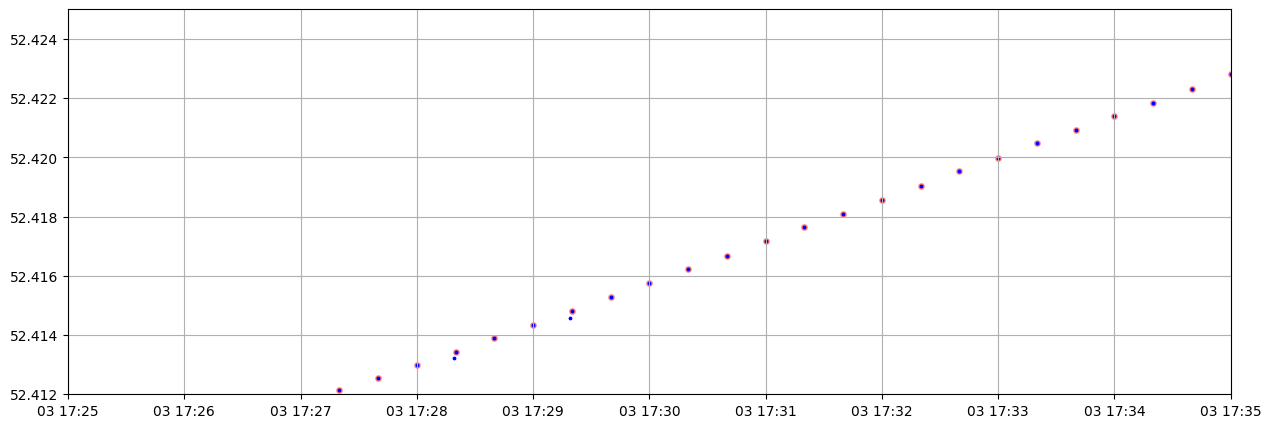

In [102]:
plt.scatter('DateTime', 'Latitude', data=df, c='red', s=15, alpha=0.4)
plt.scatter('DateTime', 'Lat', data=df, c='blue', s=3, alpha=1)
plt.xlim(pd.to_datetime('2023-06-03 17:25'), pd.to_datetime('2023-06-03 17:35'))
plt.ylim(52.412, 52.425)
plt.grid()

In [103]:
df.loc[(df['DateTime'] > pd.to_datetime('2023-06-03 17:25')) & (df['DateTime'] < pd.to_datetime('2023-06-03 17:35')), :]

,DateTime,Longitude,Latitude,Speed,Course,date,time,Temp,Wh,Wdir,...,RH,Lat,Long,mywindspeed,mywinddir,DateSec,dt,vesselvy,vesselvx,vesselspeed
370777,2023-06-03 17:25:19,NaN,NaN,NaN,NaN,03.06.2023,17:25:19,6.303,1.288,180.5,...,100.0,52.409228,106.010695,1.261048,180.499792,1.685813e+09,20.0,51.594446,-37.510464,3.189444
370778,2023-06-03 17:25:20,106.010419,52.409460,3.129,323.933,NaN,NaN,NaN,NaN,NaN,...,NaN,52.409460,106.010419,NaN,NaN,1.685813e+09,21.0,78.837203,-57.622010,4.650019
370779,2023-06-03 17:25:40,106.009846,52.409937,3.129,322.843,NaN,NaN,NaN,NaN,NaN,...,NaN,52.409937,106.009846,NaN,NaN,1.685813e+09,40.0,102.855307,-77.393764,3.218017
370780,2023-06-03 17:26:00,106.009278,52.410385,3.132,321.309,NaN,NaN,NaN,NaN,NaN,...,NaN,52.410385,106.009278,NaN,NaN,1.685813e+09,39.0,74.889783,-59.350443,2.450155
370781,2023-06-03 17:26:19,NaN,NaN,NaN,NaN,03.06.2023,17:26:19,5.782,1.652,189.9,...,100.0,52.410611,106.008971,1.618874,189.852163,1.685813e+09,20.0,50.148912,-41.646841,3.259361
370782,2023-06-03 17:26:20,106.008664,52.410836,3.199,320.941,NaN,NaN,NaN,NaN,NaN,...,NaN,52.410836,106.008664,NaN,NaN,1.685813e+09,21.0,75.779343,-61.723829,4.654099
370783,2023-06-03 17:26:40,106.008061,52.411292,3.157,320.896,NaN,NaN,NaN,NaN,NaN,...,NaN,52.411292,106.008061,NaN,NaN,1.685813e+09,40.0,95.961222,-79.968838,3.122856
370784,2023-06-03 17:27:00,106.007485,52.411699,3.097,319.115,NaN,NaN,NaN,NaN,NaN,...,NaN,52.411699,106.007485,NaN,NaN,1.685813e+09,39.0,69.385634,-59.823464,2.349089
370785,2023-06-03 17:27:19,NaN,NaN,NaN,NaN,03.06.2023,17:27:19,6.544,1.527,174.7,...,100.0,52.411916,106.007179,1.499550,174.642986,1.685813e+09,20.0,48.258598,-41.509955,3.182754
370786,2023-06-03 17:27:20,106.006873,52.412133,3.190,318.976,NaN,NaN,NaN,NaN,NaN,...,NaN,52.412133,106.006873,NaN,NaN,1.685813e+09,21.0,70.386389,-59.822875,4.398778


In [80]:
df.loc[(df['DateTime'] > pd.to_datetime('2023-06-03 17:30')) & (df['DateTime'] < pd.to_datetime('2023-06-03 17:35')), ['DateTime', 'vx', 'Longitude', 'Latitude', 'Long', 'Lat', 'dt']]

,DateTime,vx,Longitude,Latitude,Long,Lat,dt
370797,2023-06-03 17:30:20,2.013,106.001957,52.416218,106.001957,52.416218,40.0
370798,2023-06-03 17:30:40,NaN,106.001452,52.416683,106.001452,52.416683,40.0
370799,2023-06-03 17:31:00,NaN,106.000940,52.417176,106.000940,52.417176,40.0
370800,2023-06-03 17:31:20,1.050,106.000420,52.417639,106.000420,52.417639,40.0
370801,2023-06-03 17:31:40,NaN,105.999910,52.418099,105.999910,52.418099,40.0
370802,2023-06-03 17:32:00,NaN,105.999413,52.418548,105.999413,52.418548,40.0
370803,2023-06-03 17:32:20,1.837,105.998898,52.419031,105.998898,52.419031,40.0
370804,2023-06-03 17:32:40,NaN,105.998342,52.419524,105.998342,52.419524,40.0
370805,2023-06-03 17:33:00,NaN,105.997861,52.419974,105.997861,52.419974,40.0
370806,2023-06-03 17:33:20,2.126,105.997345,52.420468,105.997345,52.420468,40.0


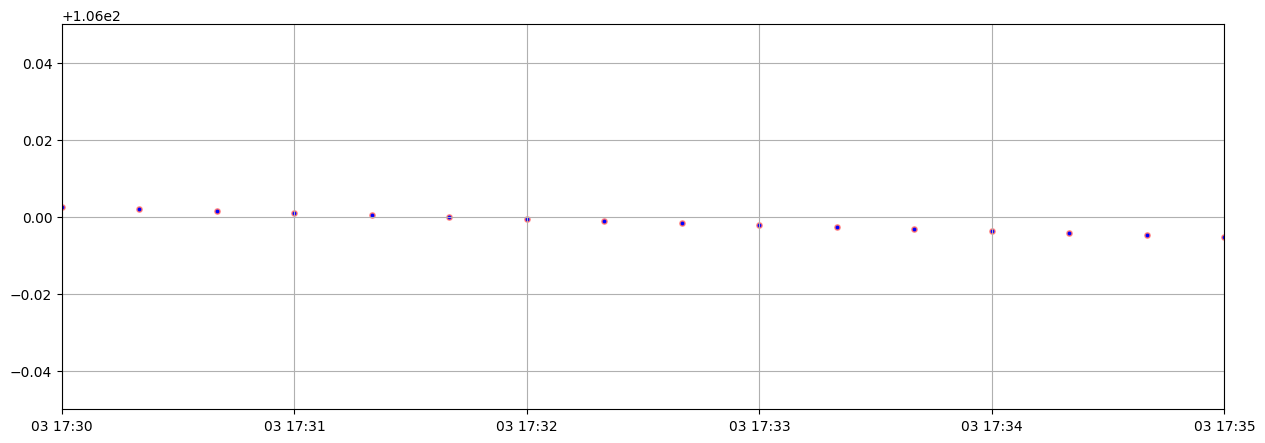

In [81]:
plt.scatter('DateTime', 'Longitude', data=df, c='red', s=15, alpha=0.4)
plt.scatter('DateTime', 'Long', data=df, c='blue', s=3, alpha=1)
plt.xlim(pd.to_datetime('2023-06-03 17:30'), pd.to_datetime('2023-06-03 17:35'))
plt.ylim(105.95, 106.05)
plt.grid()

In [ ]:
df.describe()

In [ ]:
df.interpolate(method ='linear', limit_direction ='forward', limit_area='inside').describe()

In [ ]:
df.describe()